# LOAD DATASET

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte


In [2]:
def load_fashion_data(csv_fashion_path):
    return pd.read_csv(csv_fashion_path)

In [3]:
FASHION_TRAIN_PATH = '/kaggle/input/fashionmnist/fashion-mnist_train.csv'
FASHION_TEST_PATH = '/kaggle/input/fashionmnist/fashion-mnist_test.csv'

train_set = load_fashion_data(FASHION_TRAIN_PATH)
test_set = load_fashion_data(FASHION_TEST_PATH)

# INSPECT AND PREPROCESS THE DATA

In [4]:
name_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_labels = train_set.iloc[:, 0]
train_data = train_set.iloc[:, 1:]
test_labels = test_set.iloc[:, 0]
test_data = test_set.iloc[:, 1:]

m_train = train_data.shape[0]
m_test = test_data.shape[0]
num_classes = 10
n = 28
n_flatten = 28*28

print("Number of train samples: ", m_train)
print("Number of test samples: ", m_test)

Number of train samples:  60000
Number of test samples:  10000


In [5]:
train_labels.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [6]:
test_labels.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

Số lượng mẫu ở mỗi lớp đều bằng nhau, là 6000 mẫu ở tập train và 1000 mẫu ở tập test

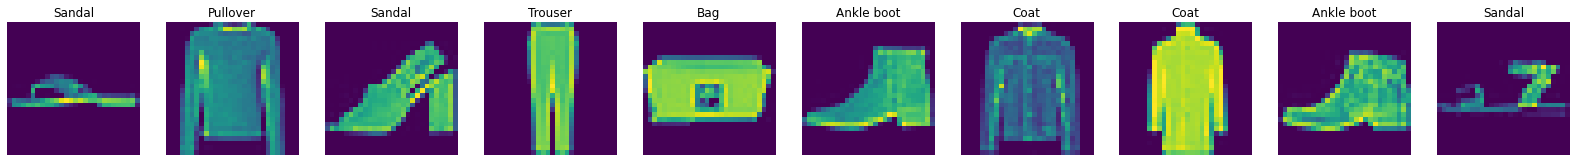

In [7]:
import matplotlib.pyplot as plt

random_idx = np.random.choice(m_train, 10)

fig, ax = plt.subplots(1, 10, figsize=(28,28))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(train_data.iloc[random_idx[i]].to_numpy().reshape((n, n)))
    ax[i].set_title(name_labels[train_labels[random_idx[i]]])

# TRAIN THE BASELINE MODEL (BASIC NEURAL NETWORK)

### CREATE MODEL

In [8]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
def get_baseline_model(input_shape):
    model = Sequential([
        Dense(input_shape=input_shape, units=256, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [10]:
baseline_model = get_baseline_model(train_data.iloc[0].shape)
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
__________________________________________________

### TRAIN MODEL

In [11]:
def train_baseline_model(model, train_data, train_labels, split_validation, epochs=100, batch_size=128):
    history = model.fit(train_data, train_labels,
                       epochs=epochs, batch_size=batch_size,
                       verbose=1,
                       validation_split=split_validation,
                       callbacks=[ModelCheckpoint('./baseline_model_checkpoint/checkpoint', monitor='val_accuracy', save_weights_only=True, save_best_only=True, frequency='epoch')])
    return history

In [12]:
from tensorflow import one_hot 
train_labels_onehot = one_hot(train_labels, num_classes).numpy()

In [13]:
history = train_baseline_model(baseline_model, train_data, train_labels_onehot, 0.15)

Epoch 1/100
399/399 [==============================] - 2s 4ms/step - loss: 1.0947 - accuracy: 0.7730 - val_loss: 0.5132 - val_accuracy: 0.8199
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.8384 - val_loss: 0.4398 - val_accuracy: 0.8426
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8553 - val_loss: 0.4258 - val_accuracy: 0.8479
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.3766 - accuracy: 0.8617 - val_loss: 0.4074 - val_accuracy: 0.8530
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.3510 - accuracy: 0.8700 - val_loss: 0.4521 - val_accuracy: 0.8362
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8742 - val_loss: 0.3908 - val_accuracy: 0.8612
Epoch 7/100
399/399 [==============================] - 2s 4ms/step - loss: 0.3266 - accuracy: 0.8808 - val_loss: 0.3657 - val_accuracy: 0.8719

Epoch 58/100
399/399 [==============================] - 1s 3ms/step - loss: 0.1345 - accuracy: 0.9491 - val_loss: 0.5145 - val_accuracy: 0.8822
Epoch 59/100
399/399 [==============================] - 1s 4ms/step - loss: 0.1318 - accuracy: 0.9518 - val_loss: 0.4965 - val_accuracy: 0.8870
Epoch 60/100
399/399 [==============================] - 1s 4ms/step - loss: 0.1323 - accuracy: 0.9511 - val_loss: 0.5388 - val_accuracy: 0.8856
Epoch 61/100
399/399 [==============================] - 1s 3ms/step - loss: 0.1324 - accuracy: 0.9511 - val_loss: 0.5030 - val_accuracy: 0.8960
Epoch 62/100
399/399 [==============================] - 1s 3ms/step - loss: 0.1253 - accuracy: 0.9532 - val_loss: 0.5003 - val_accuracy: 0.8889
Epoch 63/100
399/399 [==============================] - 1s 3ms/step - loss: 0.1249 - accuracy: 0.9535 - val_loss: 0.5032 - val_accuracy: 0.8867
Epoch 64/100
399/399 [==============================] - 1s 3ms/step - loss: 0.1172 - accuracy: 0.9558 - val_loss: 0.5348 - val_accuracy:

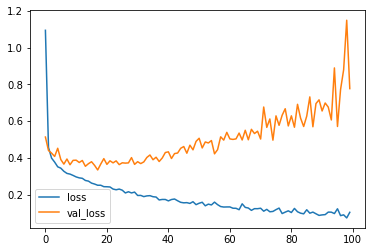

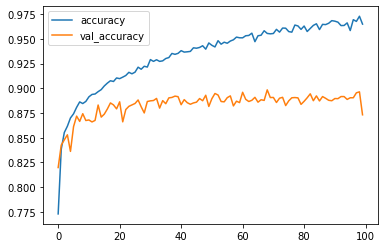

In [14]:
df = pd.DataFrame(history.history)
df.plot(y=['loss', 'val_loss'])
df.plot(y=['accuracy', 'val_accuracy'])

Từ đồ thị học, em nhận thấy baseline model cũng khá hiệu quả (val accuracy >87.5%) nhưng train accuracy có thể đạt cao hơn đến hơn 95%. Model khởi đầu của em đã bị overfit. Phần tiếp theo em sẽ cố gắng dùng các kĩ thuật dễ xử lý overfit (regularization l2, Dropout)

# TRAIN MODEL WITH REGULARIZATION

In [15]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

### CREATE MODEL

In [16]:
def get_baseline_model_with_regularization(input_shape, dropout_rate, weight_decay):
    model = Sequential([
        Dense(input_shape=input_shape, units=256, activation='relu', kernel_regularizer=regularizers.l2(l=weight_decay)),
        Dropout(rate=dropout_rate),
        Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(l=weight_decay)),
        Dropout(rate=dropout_rate),
        Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(l=weight_decay)),
        Dropout(rate=dropout_rate),
        Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(l=weight_decay)),
        Dropout(rate=dropout_rate),
        Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(l=weight_decay)),
        Dropout(rate=dropout_rate),
        Dense(units=10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [17]:
baseline_model_with_regularization = get_baseline_model_with_regularization(train_data.iloc[0].shape, 0.3, 3e-4)
baseline_model_with_regularization.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

### TRAIN MODEL

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
def train_baseline_model_with_regularization(model, train_data, train_labels, split_validation, epochs=100, batch_size=128, patience=30):
    history = model.fit(train_data, train_labels,
                       epochs=epochs, batch_size=batch_size,
                       verbose=1,
                       validation_split=split_validation,
                       callbacks=[EarlyStopping(patience=patience, monitor='val_accuracy'),
                                  ModelCheckpoint('./baseline_model_with_regularization_checkpoint/checkpoint', monitor='val_accuracy', save_weights_only=True, save_best_only=True, frequency='epoch')])
    return history

In [20]:
history = train_baseline_model_with_regularization(baseline_model_with_regularization, train_data, train_labels_onehot, 0.15, epochs=100, batch_size=512, patience=30)

Epoch 1/100
100/100 [==============================] - 1s 8ms/step - loss: 6.2328 - accuracy: 0.2834 - val_loss: 1.9183 - val_accuracy: 0.5348
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 1.8982 - accuracy: 0.4738 - val_loss: 1.4827 - val_accuracy: 0.6193
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 1.6140 - accuracy: 0.5420 - val_loss: 1.3242 - val_accuracy: 0.6366
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 1.4878 - accuracy: 0.5699 - val_loss: 1.2586 - val_accuracy: 0.6557
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 1.3523 - accuracy: 0.6319 - val_loss: 1.1047 - val_accuracy: 0.7284
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 1.2473 - accuracy: 0.6689 - val_loss: 1.0574 - val_accuracy: 0.7167
Epoch 7/100
100/100 [==============================] - 1s 5ms/step - loss: 1.1794 - accuracy: 0.6904 - val_loss: 1.0338 - val_accuracy: 0.7381

Epoch 58/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5152 - accuracy: 0.8552 - val_loss: 0.5164 - val_accuracy: 0.8583
Epoch 59/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5193 - accuracy: 0.8546 - val_loss: 0.5045 - val_accuracy: 0.8666
Epoch 60/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5119 - accuracy: 0.8559 - val_loss: 0.4883 - val_accuracy: 0.8677
Epoch 61/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5039 - accuracy: 0.8570 - val_loss: 0.5021 - val_accuracy: 0.8552
Epoch 62/100
100/100 [==============================] - 1s 5ms/step - loss: 0.4963 - accuracy: 0.8591 - val_loss: 0.4719 - val_accuracy: 0.8686
Epoch 63/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5060 - accuracy: 0.8551 - val_loss: 0.4938 - val_accuracy: 0.8656
Epoch 64/100
100/100 [==============================] - 1s 6ms/step - loss: 0.4954 - accuracy: 0.8575 - val_loss: 0.4776 - val_accuracy:

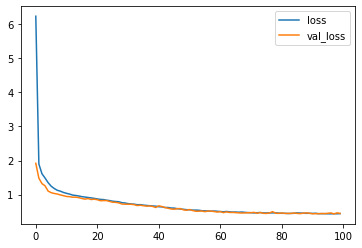

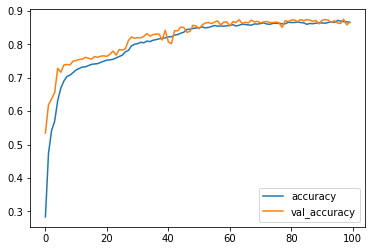

In [21]:
df = pd.DataFrame(history.history)
df.plot(y=['loss', 'val_loss'])
df.plot(y=['accuracy', 'val_accuracy'])

Sau khi tinh chỉnh các tham số regularization, bao gồm drop_out và weight_decay, em nhận thấy giá trị tốt nhất của hai siêu tham số (hyperparameters) này là 0.3 cho drop_out và 3e-4 cho weight_decay. Với việc sử dụng regularization, model trở nên bị underfit khá nhiều, accuray trên tập train giảm từ 95% xuống còn gần 87.5%. Em cố gắng thử thêm một model mạnh mẽ hơn là mạng CNN để tăng khả năng học của model. Phần bên dưới là phần cài đặt model mới với CNN (Convolutional neural network).

# CNN MODEL

In [22]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Reshape
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomContrast, Normalization

### CREATE MODEL

In [23]:
def get_cnn_model(input_shape, dropout_rate, weight_decay):
    model = Sequential([
        Reshape(input_shape=input_shape, target_shape=(n, n, 1)),
        RandomFlip(mode="vertical"),
        RandomContrast(factor=0.2),
        Normalization(),
        Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
        Dropout(rate=dropout_rate),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
        Dropout(rate=dropout_rate),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2), data_format="channels_last"),
        Flatten(),
        Dense(units=3136, activation='relu', kernel_regularizer=regularizers.l2(l=weight_decay)),
        Dropout(rate=dropout_rate),
        BatchNormalization(),
        Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(l=weight_decay)),
        Dropout(rate=dropout_rate),
        BatchNormalization(),
        Dense(units=10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [24]:
cnn_model = get_cnn_model(train_data.iloc[0].shape, 0.3, 3e-4)
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 28, 28, 1)         0         
_________________________________________________________________
random_contrast (RandomContr (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)       

### TRAIN MODEL

In [25]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [26]:
def train_cnn_model(model, train_data, train_labels, split_validation, epochs=100, batch_size=128, patience=30):
    history = model.fit(train_data, train_labels,
                       epochs=epochs, batch_size=batch_size,
                       verbose=1,
                       validation_split=split_validation,
                       callbacks=[ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=0, factor=0.5, min_lr=0.00001),
                                  EarlyStopping(patience=patience, monitor='val_accuracy'),
                                  ModelCheckpoint('./cnn_model_checkpoint/checkpoint', monitor='val_accuracy', save_weights_only=True, save_best_only=True, frequency='epoch')])
    return history

In [28]:
history = train_cnn_model(cnn_model, train_data, train_labels_onehot, 0.15, epochs=1000, batch_size=128, patience=30)

Epoch 1/1000
399/399 [==============================] - 10s 26ms/step - loss: 1.5940 - accuracy: 0.8121 - val_loss: 1.0588 - val_accuracy: 0.8400
Epoch 2/1000
399/399 [==============================] - 9s 22ms/step - loss: 1.0140 - accuracy: 0.8528 - val_loss: 1.0650 - val_accuracy: 0.8352
Epoch 3/1000
399/399 [==============================] - 10s 26ms/step - loss: 1.0492 - accuracy: 0.8636 - val_loss: 1.1291 - val_accuracy: 0.8570
Epoch 4/1000
399/399 [==============================] - 10s 25ms/step - loss: 1.0569 - accuracy: 0.8716 - val_loss: 0.9951 - val_accuracy: 0.8887
Epoch 5/1000
399/399 [==============================] - 10s 25ms/step - loss: 1.0350 - accuracy: 0.8764 - val_loss: 0.9722 - val_accuracy: 0.8942
Epoch 6/1000
399/399 [==============================] - 10s 25ms/step - loss: 1.0353 - accuracy: 0.8788 - val_loss: 0.9814 - val_accuracy: 0.8943
Epoch 7/1000
399/399 [==============================] - 9s 22ms/step - loss: 1.0363 - accuracy: 0.8788 - val_loss: 1.0224 - v

399/399 [==============================] - 9s 22ms/step - loss: 0.5267 - accuracy: 0.9196 - val_loss: 0.5126 - val_accuracy: 0.9237
Epoch 58/1000
399/399 [==============================] - 9s 21ms/step - loss: 0.5265 - accuracy: 0.9187 - val_loss: 0.5257 - val_accuracy: 0.9193
Epoch 59/1000
399/399 [==============================] - 9s 22ms/step - loss: 0.5226 - accuracy: 0.9196 - val_loss: 0.5227 - val_accuracy: 0.9213
Epoch 60/1000
399/399 [==============================] - 10s 25ms/step - loss: 0.5240 - accuracy: 0.9204 - val_loss: 0.5096 - val_accuracy: 0.9254
Epoch 61/1000
399/399 [==============================] - 9s 22ms/step - loss: 0.5172 - accuracy: 0.9196 - val_loss: 0.5120 - val_accuracy: 0.9253
Epoch 62/1000
399/399 [==============================] - 9s 22ms/step - loss: 0.5156 - accuracy: 0.9208 - val_loss: 0.5079 - val_accuracy: 0.9244
Epoch 63/1000
399/399 [==============================] - 9s 22ms/step - loss: 0.5192 - accuracy: 0.9215 - val_loss: 0.5155 - val_accuracy

399/399 [==============================] - 8s 21ms/step - loss: 0.4825 - accuracy: 0.9252 - val_loss: 0.4824 - val_accuracy: 0.9252
Epoch 114/1000
399/399 [==============================] - 9s 22ms/step - loss: 0.4733 - accuracy: 0.9274 - val_loss: 0.4884 - val_accuracy: 0.9236
Epoch 115/1000
399/399 [==============================] - 9s 22ms/step - loss: 0.4826 - accuracy: 0.9270 - val_loss: 0.4853 - val_accuracy: 0.9266
Epoch 116/1000
399/399 [==============================] - 9s 22ms/step - loss: 0.4784 - accuracy: 0.9279 - val_loss: 0.4881 - val_accuracy: 0.9279
Epoch 117/1000
399/399 [==============================] - 10s 26ms/step - loss: 0.4776 - accuracy: 0.9262 - val_loss: 0.4659 - val_accuracy: 0.9323
Epoch 118/1000
399/399 [==============================] - 9s 21ms/step - loss: 0.4757 - accuracy: 0.9263 - val_loss: 0.4785 - val_accuracy: 0.9240
Epoch 119/1000
399/399 [==============================] - 9s 22ms/step - loss: 0.4769 - accuracy: 0.9260 - val_loss: 0.5086 - val_ac

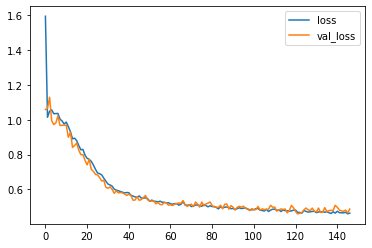

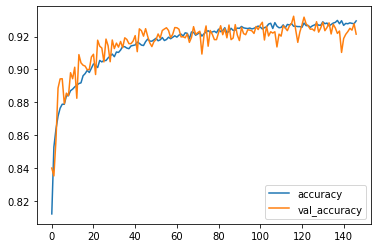

In [29]:
df = pd.DataFrame(history.history)
df.plot(y=['loss', 'val_loss'])
df.plot(y=['accuracy', 'val_accuracy'])

# EVALUATING THE FINAL MODEL

In [30]:
def evaluate_model(model, test_data, test_labels):
    return model.evaluate(test_data, test_labels, verbose=1)

In [31]:
test_labels_onehot = one_hot(test_labels, num_classes).numpy()

FINAL_MODEL = cnn_model
evaluate_model(FINAL_MODEL, test_data, test_labels_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 0.4861 - accuracy: 0.9194


[0.4861167073249817, 0.9193999767303467]

In [32]:
incorrects = tensorflow.argmax(FINAL_MODEL.predict(test_data.iloc[:]), axis=1) != test_labels
incorrect_classes = pd.Series(name_labels[i] for i in test_labels[incorrects])
incorrect_classes.value_counts()

Shirt          221
Pullover       152
Coat           134
T-shirt/top    131
Sneaker         59
Dress           38
Sandal          27
Ankle boot      22
Bag             18
Trouser          4
dtype: int64

# PREDICTION

In [33]:
#MODEL_PATH = './baseline_model_checkpoint/checkpoint'
#MODEL_PATH = './baseline_model_with_regularization_checkpoint/checkpoint'
MODEL_PATH = './cnn_model_checkpoint/checkpoint'

#pretrained_model = get_baseline_model(train_data.iloc[0].shape)
#pretrained_model = get_baseline_model_with_regularization(train_data.iloc[0].shape, 0.3, 3e-4)
pretrained_model = get_cnn_model(train_data.iloc[0].shape, 0.3, 3e-4)

pretrained_model.load_weights(MODEL_PATH)

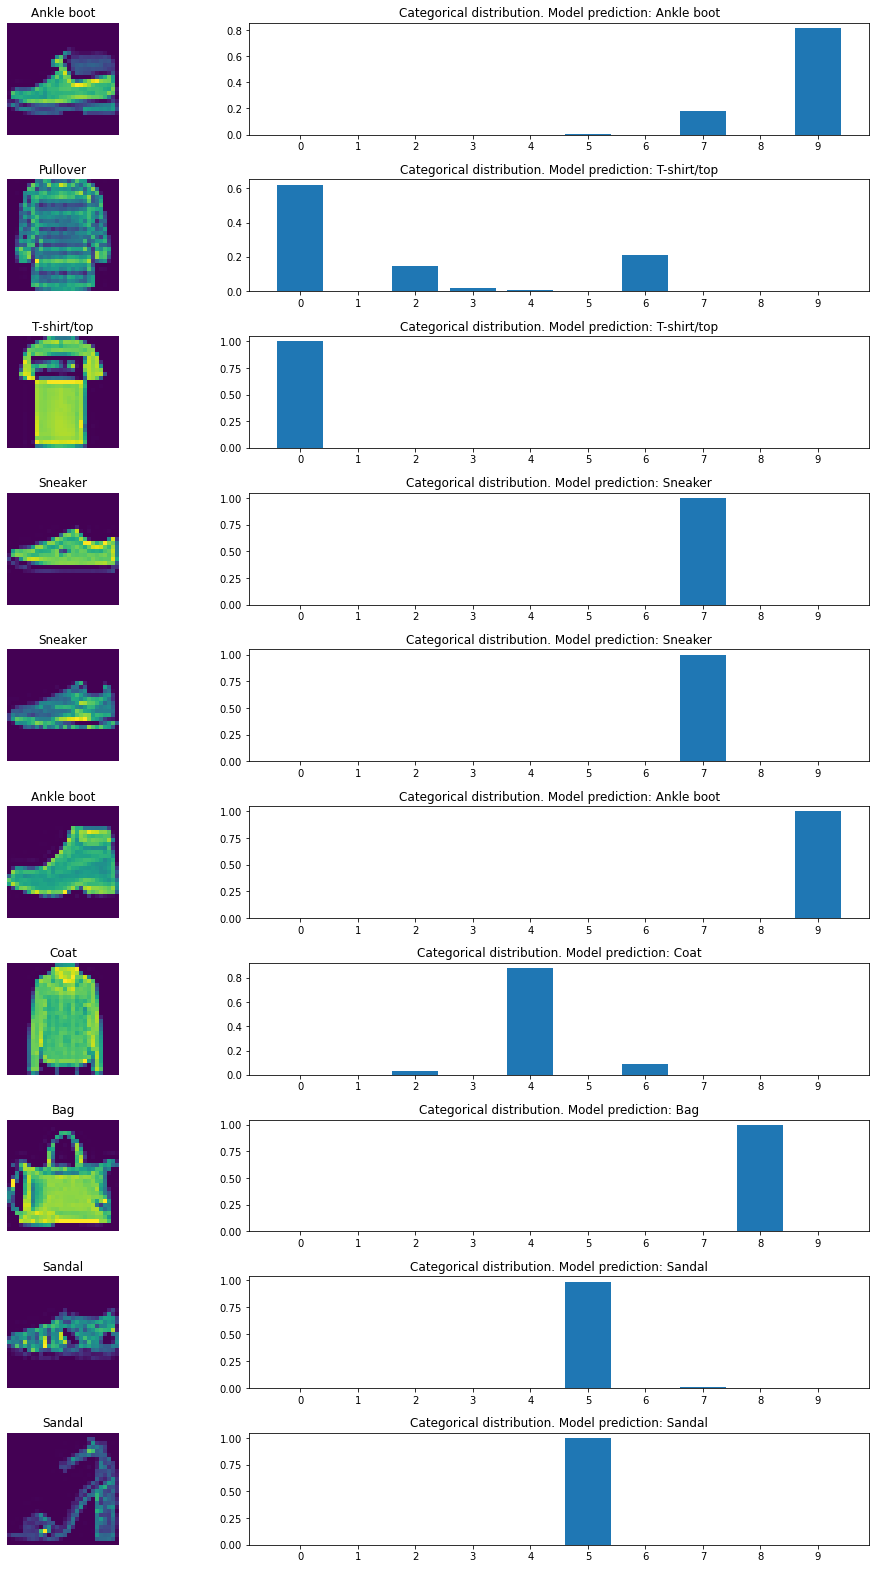

In [34]:
random_test_idx = np.random.choice(m_test, 10)
predictions = pretrained_model.predict(test_data.iloc[random_test_idx])

fig, ax = plt.subplots(10, 2, figsize=(20,28))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i in range(10):
    ax[i,0].set_axis_off()
    ax[i,0].imshow(test_data.iloc[random_test_idx[i]].to_numpy().reshape((28,28)))
    ax[i,0].set_title(name_labels[test_labels[random_test_idx[i]]])
    ax[i,1].bar(np.arange(len(predictions)), predictions[i])
    ax[i,1].set_xticks(np.arange(len(predictions)))
    ax[i,1].set_title(f"Categorical distribution. Model prediction: {name_labels[np.argmax(predictions[i])]}")